In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_models import LinearBinaryClassifier, LinearOneVsAllClassifier
%matplotlib inline

In [2]:
folders = ['oracle', 'randomAscent', 'greedyAscent', 'gradientDescent']

In [11]:
loss_histories = []
max_acc_histories = []

for folder in folders:
    lh = np.load('binary_experiments/binary-'+folder+"-1-17/loss_history.npy")
    loss_histories.append(lh)
    ma = np.load('binary_experiments/binary-'+folder+"-1-17/max_acc_history.npy")
    max_acc_histories.append(ma)

In [28]:
data_path = "binary_data_2"
models = []
exp_type = "binary"
num_classifiers = 5
alpha = .5

X_exp = np.load(data_path + "/" + "X_exp.npy")
Y_exp = np.load(data_path + "/" + "Y_exp.npy")

for i in xrange(num_classifiers):
    weights = np.load(data_path + "/" + "weights_{}.npy".format(i))
    bias = np.load(data_path + "/" + "bias_{}.npy".format(i))
    if exp_type == "binary":
        model = LinearBinaryClassifier(weights, bias)
    else:
        model = LinearOneVsAllClassifier(10, weights, bias)
    models.append(model)

In [29]:
ensemble_weights = sum([1.0 / num_classifiers * model.weights for model in models ])
ensemble_bias = sum([1.0 / num_classifiers * model.bias for model in models ])

In [30]:
ensemble_model = LinearBinaryClassifier(ensemble_weights, ensemble_bias)

In [31]:
ensemble_model.evaluate(X_exp, Y_exp)

1.0

In [61]:
def normalize(noise, alpha):
    for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha
    return noise

noise_ensemble =  -1 * ensemble_model.gradient(X_exp, Y_exp)
noise_ensemble = normalize(noise_ensemble, alpha)

individual_noise = [-1 * model.gradient(X_exp, Y_exp) for model in models]
individual_noise = [normalize(noise, alpha) for noise in individual_noise]

In [62]:
max_model = [max([model.evaluate(X_exp + noise, Y_exp) for model in models]) for noise in individual_noise]

In [65]:
min(max_model)

0.91

In [35]:
ensemble_res = max([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in models])

In [56]:
ensemble_res

0.71

In [59]:
best_model_trend

[1.0, 0.99, 0.99, 0.97, 0.94, 0.91, 0.89, 0.85, 0.81, 0.77, 0.73]

In [41]:
ensemble_trend = []
best_model_trend = []

for a in np.linspace(0,1,11):
    noise_ensemble =  -1 * ensemble_model.gradient(X_exp, Y_exp)
    noise_ensemble = normalize(noise_ensemble, a)

    individual_noise = [-1 * model.gradient(X_exp, Y_exp) for model in models]
    individual_noise = [normalize(noise, a) for noise in individual_noise]
    
    ensemble_trend.append(max([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in models]))
    best_model_trend.append(min([max([model.evaluate(X_exp + noise, Y_exp) for model in models]) 
                             for noise in individual_noise]))

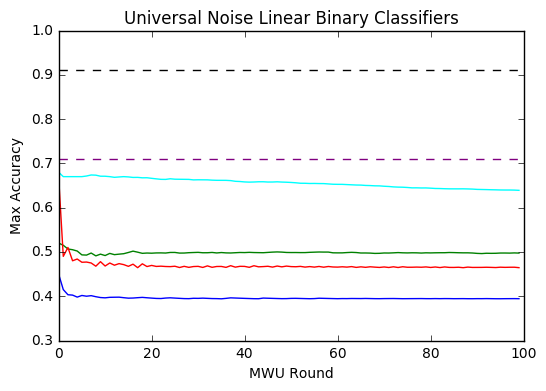

In [70]:
display_folders = ["oracle", 'random ascent', 'greedy ascent', 'reverse hinge loss']
colors = ["blue", "green", "red", "cyan"]
for i, ma in enumerate(max_acc_histories):
    plt.plot(range(100), ma, color=colors[i])
plt.plot(range(100), [ensemble_trend[5]] * 100, linestyle="--", color="purple")
plt.plot(range(100), [best_model_trend[5]] * 100, linestyle="--", color="black")
# plt.legend(display_folders + ["ensemble baseline"], loc="right", bbox_to_anchor=(1,.55), fontsize=8)
plt.title("Universal Noise Linear Binary Classifiers")
plt.ylabel("Max Accuracy")
plt.xlabel("MWU Round")

In [ ]:
for lh in loss_histories:
    plt.plot(range(100), lh)
plt.legend(folders, loc="right", bbox_to_anchor=(1.5,.5))
plt.title("Loss of Learner - Binary Experiments")
plt.ylabel("Loss")
plt.xlabel("MWU Round")

In [ ]:
max_acc_histories[0][-1]

In [ ]:
def findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha, target):
    noise =  -1 * ensemble_model.gradient(X_exp, Y_exp)
    for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha

    res = max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    
    if res > target:
        return findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha + .01, target)
    else:
        return alpha
    

In [ ]:
findAlphaEquivalent(ensemble_model, X_exp, Y_exp, .5, .3944)

In [ ]:
for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * .70
print max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    

In [9]:
loss_histories = []
max_acc_histories = []

results = []

for folder in folders:
    noise_res = []
    for x in ["0.1", "0.2", "0.3", "0.4", "0.6", "0.7", "0.8", "0.9", "1.0"]:
        ma = np.load('binary_experiments/binary-untargeted-'+folder+"-{}".format(x)+"-2-3/acc_history.npy")
        noise_res.append(ma[-1])
    results.append(noise_res)


In [16]:
results[0][:4]

[0.9699999999999992,
 0.8902000000000004,
 0.7628999999999999,
 0.5379000000000006]

In [17]:
for i in xrange(len(folders)):
    results[i] = results[i][:4] + [max_acc_histories[i][-1]] + results[i][4:]

In [25]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

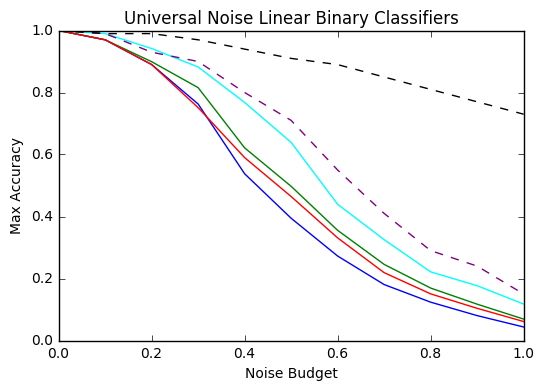

In [72]:
display_folders = ["oracle", 'random ascent', 'greedy ascent', 'reverse hinge loss']
colors = ["blue", "green", "red", "cyan"]
for i, r in enumerate(results):
    plt.plot(np.linspace(0, 1, 11), [1.0] + r, color=colors[i])
plt.plot(np.linspace(0, 1, 11), ensemble_trend, linestyle="--", color="purple")
plt.plot(np.linspace(0, 1, 11), best_model_trend, linestyle="--", color="black")
# plt.legend(display_folders + ["ensemble baseline"], loc="right", bbox_to_anchor=(1,.55), fontsize=8)
plt.title("Universal Noise Linear Binary Classifiers")
plt.ylabel("Max Accuracy")
plt.xlabel("Noise Budget")

In [8]:
import os
os.listdir("binary_experiments/binary-untargeted-oracle-0.1-2-3")

['weights_60.npy',
 'loss_history_10.npy',
 'acc_history_10.npy',
 'noise_30.npy',
 'action_loss_10.npy',
 'binary-untargeted-oracle-0.1-2-3.log',
 'noise.npy',
 'noise_20.npy',
 'weights_70.npy',
 'acc_history_70.npy',
 'noise_50.npy',
 'action_loss_70.npy',
 'noise_90.npy',
 'loss_history_70.npy',
 'loss_history.npy',
 'loss_history_60.npy',
 'weights_10.npy',
 'noise_80.npy',
 'action_loss_60.npy',
 'noise_40.npy',
 'acc_history_60.npy',
 'weights.npy',
 'loss_history_90.npy',
 'action_loss_50.npy',
 'noise_70.npy',
 'acc_history_50.npy',
 'loss_history_50.npy',
 'weights_20.npy',
 'action_loss_90.npy',
 'acc_history_90.npy',
 'acc_history_80.npy',
 'action_loss_80.npy',
 'weights_30.npy',
 'loss_history_40.npy',
 'acc_history_40.npy',
 'noise_60.npy',
 'action_loss_40.npy',
 'loss_history_80.npy',
 'acc_history.npy',
 'loss_history_30.npy',
 'weights_40.npy',
 'weights_80.npy',
 'action_loss_30.npy',
 'noise_10.npy',
 'acc_history_30.npy',
 'acc_history_20.npy',
 'action_loss_20.np